In [48]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [49]:
dataset = 'model2/keypoint_classifier/keypoint.csv'
model_save_path = 'model2/keypoint_classifier/keypoint_classifier.keras' #al posto di .hdf5
tflite_save_path = 'model2/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [50]:
NUM_CLASSES = 8

# Dataset reading

In [51]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [52]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [54]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [55]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_6 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │            88 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,158 (4.52 KB)

 Trainable params: 1,158 (4.52 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [57]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [58]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
54/60 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.1268 - loss: 2.1604 
Epoch 1: saving model to model2/keypoint_classifier/keypoint_classifier.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1303 - loss: 2.1519 - val_accuracy: 0.2406 - val_loss: 1.9380
Epoch 2/1000
51/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2383 - loss: 1.9346 
Epoch 2: saving model to model2/keypoint_classifier/keypoint_classifier.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2417 - loss: 1.9300 - val_accuracy: 0.3813 - val_loss: 1.7660
Epoch 3/1000
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.3097 - loss: 1.8121
Epoch 3: saving model to model2/keypoint_classifier/keypoint_classifier.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3100 - loss: 1.8112 - val_accuracy: 0.4451 - val_loss: 1.6290
Epoch 4/1000
57/60 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.3600 - loss: 1.6851
Epoch 4: saving model to model2/keypoint_classifier/keypoint_classifi

In [59]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9344 - loss: 0.3257 


In [60]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [61]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[7.9130840e-01 8.9190148e-02 1.1286738e-01 1.4535126e-05 2.7281643e-04
 2.1519785e-05 4.5803841e-03 1.7448133e-03]
0


# Confusion matrix

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step


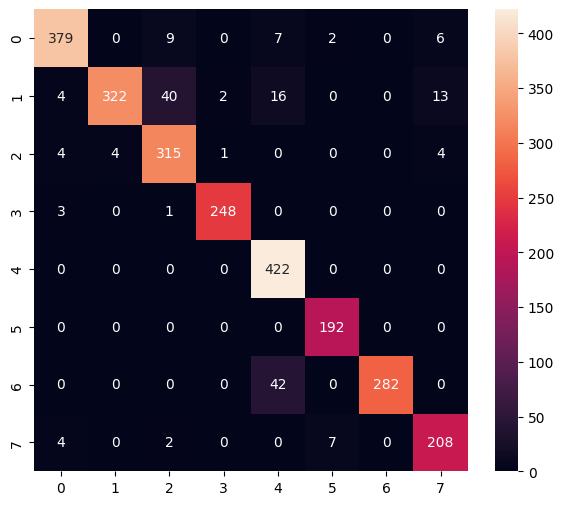

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       403
           1       0.99      0.81      0.89       397
           2       0.86      0.96      0.91       328
           3       0.99      0.98      0.99       252
           4       0.87      1.00      0.93       422
           5       0.96      1.00      0.98       192
           6       1.00      0.87      0.93       324
           7       0.90      0.94      0.92       221

    accuracy                           0.93      2539
   macro avg       0.94      0.94      0.94      2539
weighted avg       0.94      0.93      0.93      2539



In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [63]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [64]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\dgoff\AppData\Local\Temp\tmpc6idtk4p\assets


INFO:tensorflow:Assets written to: C:\Users\dgoff\AppData\Local\Temp\tmpc6idtk4p\assets


Saved artifact at 'C:\Users\dgoff\AppData\Local\Temp\tmpc6idtk4p'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)
Captures:
  1792917552208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1792917551824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1792917548560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1792917550672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1792917549136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1792936722064: TensorSpec(shape=(), dtype=tf.resource, name=None)


6808

# Inference test

In [65]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [66]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [67]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [68]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[7.91308105e-01 8.91902223e-02 1.12867594e-01 1.45351769e-05
 2.72816193e-04 2.15197360e-05 4.58037993e-03 1.74481666e-03]
0


: 